Обучение без учителя

Предобработка

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('heart_disease.csv')

df.columns = df.columns.str.strip()
df['sex'] = df['sex'].astype("category")
df['chest pain type'] = df['chest pain type'].astype("category")
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype("category")
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].astype('category')
df['exercise induced angina'] = df['exercise induced angina'].astype('category')
df['slope of peak'] = df['slope of peak'].astype('category')
df['Disease'] = df['Disease'].astype('category')

# Округление до ближайшего целого

# Округление до ближайшего целого
df['oldpeak'] = df['oldpeak'].astype('int64')
# df = df.select_dtypes(include=['float']).round().astype(int)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex                                   270 non-null    category
 2   chest pain type                       270 non-null    category
 3   resting blood pressure                270 non-null    int64   
 4   serum cholestoral in mg/dl            270 non-null    int64   
 5   fasting blood sugar > 120 mg/dl       270 non-null    category
 6   resting electrocardiographic results  270 non-null    category
 7   maximum heart rate achieved           270 non-null    int64   
 8   exercise induced angina               270 non-null    category
 9   oldpeak                               270 non-null    int64   
 10  slope of peak                         270 non-null    category
 11  number


Преобразование категориальных фич

In [4]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns 
df = pd.get_dummies(df, columns=category_columns, drop_first=True)
category_columns

Index(['sex', 'chest pain type', 'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results', 'exercise induced angina',
       'slope of peak', 'Disease'],
      dtype='object')


Преобразование непрерывных фич


In [5]:
from sklearn.preprocessing import MinMaxScaler
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
numeric_features

['age',
 'resting blood pressure',
 'serum cholestoral in mg/dl',
 'maximum heart rate achieved',
 'oldpeak',
 'number of major vessels',
 'thal']

In [6]:
df

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak,number of major vessels,thal,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar > 120 mg/dl_1,resting electrocardiographic results_1,resting electrocardiographic results_2,exercise induced angina_1,slope of peak_2,slope of peak_3,Disease_1
0,0.854167,0.339623,0.447489,0.290076,0.333333,1.000000,0.00,True,False,False,True,False,False,True,False,True,False,True
1,0.791667,0.198113,1.000000,0.679389,0.166667,0.000000,1.00,False,False,True,False,False,False,True,False,True,False,False
2,0.583333,0.283019,0.308219,0.534351,0.000000,0.000000,1.00,True,True,False,False,False,False,False,False,False,False,True
3,0.729167,0.320755,0.312785,0.259542,0.000000,0.333333,1.00,True,False,False,True,False,False,False,True,True,False,False
4,0.937500,0.245283,0.326484,0.381679,0.000000,0.333333,0.00,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,0.735849,0.166667,0.694656,0.000000,0.000000,1.00,True,False,True,False,True,False,False,False,False,False,False
266,0.312500,0.245283,0.312785,0.778626,0.000000,0.000000,1.00,True,True,False,False,False,False,False,False,False,False,False
267,0.562500,0.433962,0.383562,0.625954,0.166667,0.000000,0.00,False,True,False,False,False,False,True,False,True,False,False
268,0.583333,0.433962,0.150685,0.587786,0.000000,0.000000,0.75,True,False,False,True,False,False,False,False,True,False,False



K-means


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):
    if isinstance(X, pd.DataFrame):
        X = X.values.astype(float)
    
    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()
    
    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        
        for step in range(max_iters):
            #ручное вычисление евклидова расстояния
            distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids)**2, axis=2))
            labels = np.argmin(distances, axis=1)
            
            plot_kmeans_iteration(X, centroids, labels, step)
            
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            
            if np.all(centroids == new_centroids):
                break
            
            centroids = new_centroids
    
    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)
    
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')
    
    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

K-means через реализацию skelarn

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

df_k_means = df.copy()
df_k_means['Cluster'] = labels

print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")


Статистика по кластерам:

Статистика для признака 'age':
             mean       std    min       max
Cluster                                     
0        0.574552  0.170013  0.125  1.000000
1        0.493568  0.197641  0.000  0.979167

Статистика для признака 'resting blood pressure':
             mean       std       min       max
Cluster                                        
0        0.381101  0.179793  0.056604  1.000000
1        0.328922  0.155468  0.000000  0.811321

Статистика для признака 'serum cholestoral in mg/dl':
             mean       std       min       max
Cluster                                        
0        0.292313  0.106110  0.086758  0.646119
1        0.274218  0.126622  0.000000  1.000000

Статистика для признака 'maximum heart rate achieved':
             mean       std      min       max
Cluster                                       
0        0.513785  0.177582  0.00000  0.946565
1        0.671090  0.141790  0.19084  1.000000

Статистика для признака 'old

Самый лучший силуэт - 0.2174 при двух кластерах

Кластер 0:
<li>Больше мужчин (В случае если 1 - мужской пол)</li>
<li>Высокая депрессия сегмента ST</li>
<li>У всех есть заболевания сердца (среднее - 0,9)</li>
<li>Часто встречается тип боли в груди 4</li>
<li>Высокое значение thal</li>
<li>Больше сосудов</li>


Кластер 1:
<li>Больше женщин</li>
<li>Депрессия сегмента ST сильно ниже (всего 0,066)</li>
<li>Очень низкий процент больных сердечек (среднее - 0,067)</li>
<li>Иногда встречается тип боли в груди 2 и 3</li>
<li>Высокое значение thal</li>
<li>Очень мало сосудов</li>

Что имеем по итогу:
Скорее всего в кластере 0 ребята в очень высокой зоне риска сердечных заболеваний. В кластере 1 не самые здоровые, но профилактики будет достаточно

In [9]:
from sklearn.metrics  import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 82.0750
Индекс Дэвиса-Болдина для K-means: 1.7607
Коэффициент силуэта для K-means: 0.2174


DBSSCAN

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])

Output()

DBSSCAN через sklearn

Количество кластеров: 2
Статистика по кластерам:

Статистика для признака 'age':
             mean       std       min       max  count
Cluster                                               
0        0.588542  0.116207  0.291667  0.791667     12
1        0.414062  0.122210  0.250000  0.562500      8

Статистика для признака 'resting blood pressure':
             mean       std       min       max  count
Cluster                                               
0        0.349057  0.132991  0.150943  0.622642     12
1        0.273585  0.073422  0.150943  0.377358      8

Статистика для признака 'serum cholestoral in mg/dl':
             mean       std       min       max  count
Cluster                                               
0        0.260464  0.086476  0.116438  0.372146     12
1        0.294521  0.092828  0.171233  0.454338      8

Статистика для признака 'maximum heart rate achieved':
             mean       std       min       max  count
Cluster                                   

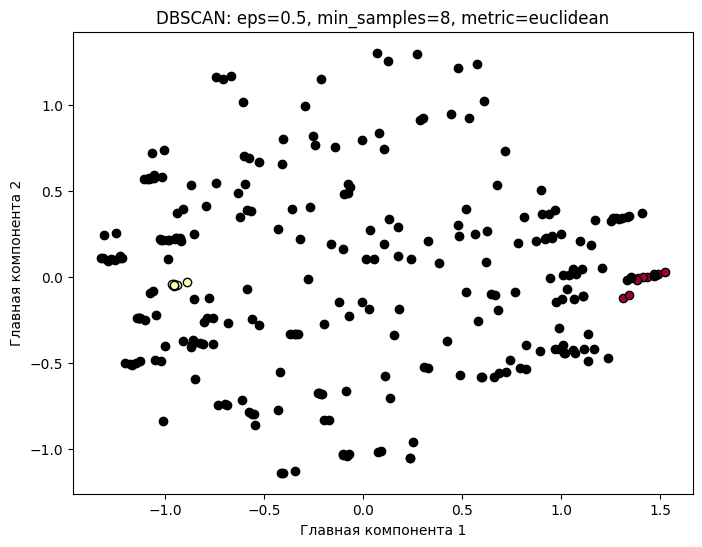

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 8
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [12]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 171.4683
Индекс Дэвиса-Болдина для DBSCAN: 0.5305
Коэффициент силуэта для DBSCAN: 0.6249


In [13]:
Y = df['Disease_1']
X = df.drop('Disease_1', axis=1)

In [14]:
X_processed = X.copy()
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [15]:
numeric_features = X_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [16]:
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

Количество кластеров: 2
Статистика по кластерам:

Статистика для признака 'age':
             mean       std    min       max  count
Cluster                                            
0        0.544393  0.168331  0.125  0.854167    107
1        0.499563  0.200414  0.000  0.979167    143

Статистика для признака 'resting blood pressure':
             mean       std  min       max  count
Cluster                                          
0        0.354259  0.158546  0.0  0.811321    107
1        0.329133  0.150528  0.0  0.811321    143

Статистика для признака 'serum cholestoral in mg/dl':
             mean       std       min       max  count
Cluster                                               
0        0.275210  0.103284  0.000000  0.646119    107
1        0.277437  0.107885  0.034247  0.664384    143

Статистика для признака 'maximum heart rate achieved':
             mean       std       min       max  count
Cluster                                               
0        0.550688  

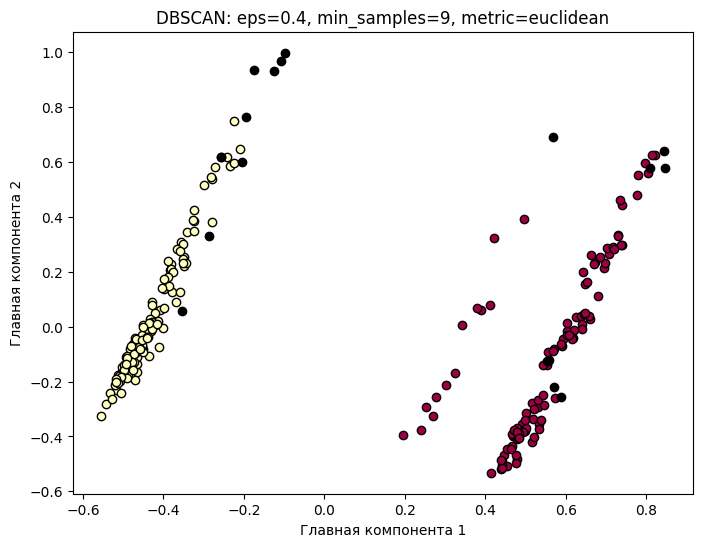

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.4
min_samples = 9
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(X_iqr)

# Добавляем метки кластеров в DataFrame
df_dbscan = X_iqr.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in X_iqr.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(X_iqr[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_iqr)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

В общем, метрики oldpeak, vessels, thal с существинными различиями, и все они совпадают со значениями метрик при использовании K-means

In [18]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.4
min_samples = 9

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_iqr)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = X_iqr[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 319.2216
Индекс Дэвиса-Болдина для DBSCAN: 0.8303
Коэффициент силуэта для DBSCAN: 0.5063


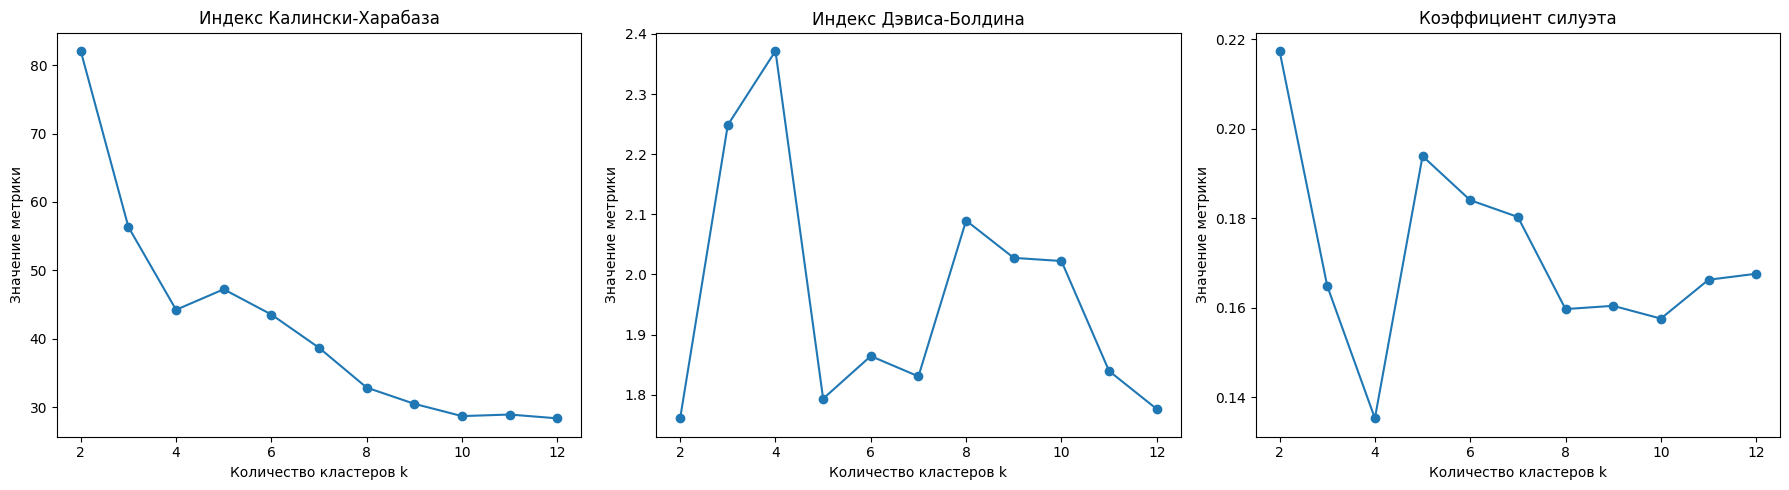

In [19]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

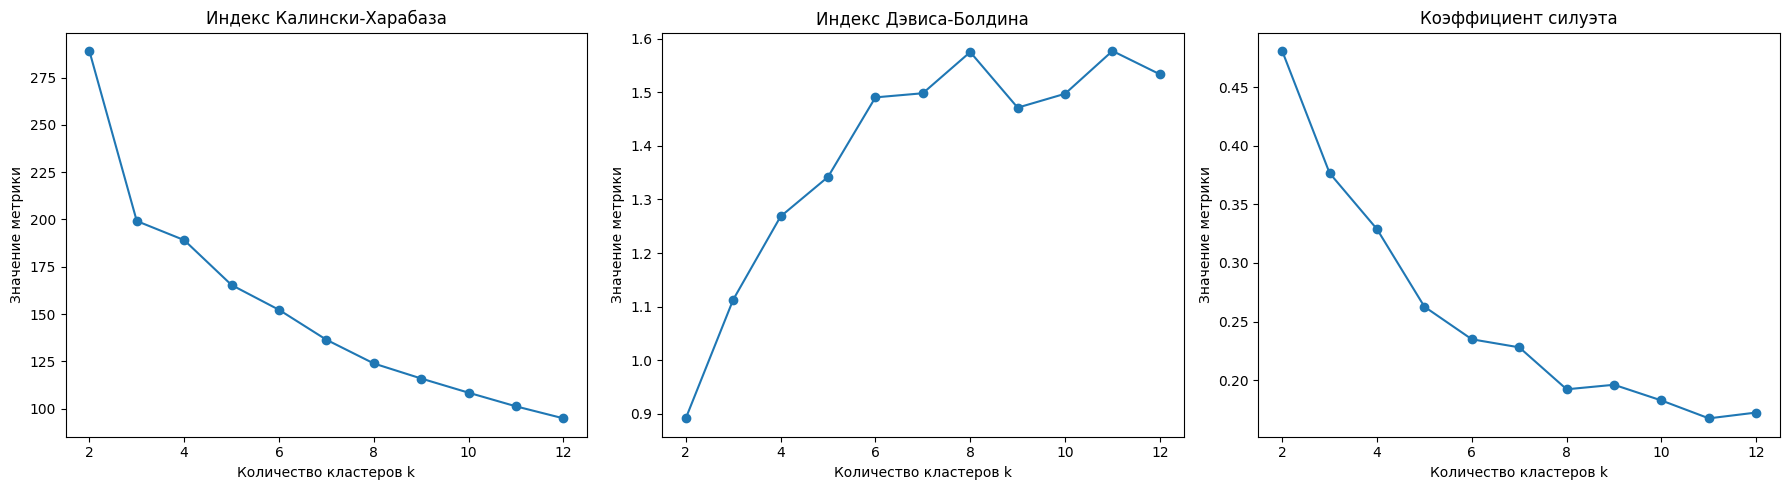

In [20]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_iqr)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(X_iqr, labels)
    db_score = davies_bouldin_score(X_iqr, labels)
    silhouette_avg = silhouette_score(X_iqr, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

Обработка текстовых данных

In [21]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     Подключение не установлено, т.к. конечный компьютер
[nltk_data]     отверг запрос на подключение>


In [22]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pymorphy3
from nltk.corpus import stopwords

morph = pymorphy3.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

with open('news.txt', 'r', encoding='utf-8') as f:
    content = f.read()

content = content.replace('\xa0', ' ')

articles_raw = content.split('='*50)

titles = []
texts = []

for article in articles_raw:
    article = article.strip()
    
    if not article:
        continue
    
    lines = article.split('\n')

    if len(lines) >= 2:
        title = lines[0]
        text = ' '.join(lines[1:])
        
        titles.append(title)
        texts.append(text)


In [24]:
titles[:2]

['Строительство сквера с мостом на Кирова отстало от графика уже на месяц, а подрядчик рубит деревья без разрешения',
 'Два человека погибли на пожаре в частном доме в Артёме']

In [25]:
texts[:2]

['Пешеходный мост и сквер на Кирова, 116 во Владивостоке через месяц после окончания срока контракта готов не многим больше чем наполовину. С подрядчиком не заключены дополнительные соглашения, а требование по штрафам было предъявлено только одно, и то в октябре. Работа на месте не кипит, хотя некоторые очертания пешеходных троп и часть конструкции моста уже есть. Но сам подрядчик рискует стать фигурантом уголовного дела о незаконной вырубке зелёных насаждений, потому что разрешения на это он не получал. Подрядчика на строительство пешеходного моста в районе Кирова, 116 нашли летом. Контракт с ООО «Союз-Н» почти на 34 млн рублей заключили в августе 2024 года со сроком исполнения до 8 ноября. По проекту территория на Кирова должна стать удобным транзитом между домами, а также комфортным и приятным местом для прогулок. Здесь планировалось обустроить смотровые площадки, провести дополнительное озеленение, установить несколько арт-объектов, скамьи и элемент «Слуховое ухо» для звуков природ

In [26]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]

In [27]:
texts_preprocessed[:2]

['пешеходный мост сквер киров владивосток месяц окончание срок контракт готовый многий наполовину подрядчик заключить дополнительный соглашение требование штраф предъявить один октябрь работа место кипеть хотя некоторый очертание пешеходный троп часть конструкция мост подрядчик рисковать стать фигурант уголовный дело незаконный вырубка зелёный насаждение разрешение это получать подрядчик строительство пешеходный мост район киров наслать лето контракт ооо союзна млн рубль заключить август год срок исполнение ноябрь проект территория киров должный стать удобный транзит дом также комфортный приятный место прогулка планироваться обустроить смотровой площадка провести дополнительный озеленение установить несколько артобъект скамья элемент слуховой ухо звук природа также провести система освещение видеонаблюдение приступить подрядчик поздно процесс затянуть срок контракт исполнить сей пора день корреспондент новость заглянуть объект никакой движение застать часть мостик смонтировать оформить

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)

In [29]:
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.7, min_samples=3, metric='cosine')
labels = dbscan.fit_predict(X)

In [30]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')

Количество кластеров: 25

Кластер 0:
- Два человека погибли на пожаре в частном доме в Артёме
- На Чуркине сгорел заброшенный дом
- Во Владивостоке загорелся супермаркет «Светофор» на Чапаева

Кластер 1:
- Собственную региональную ипотеку могут запустить в Приморье
- За пять лет с дальневосточной ипотекой квартиры в новостройках в Приморье обогнали вторичку по стоимости и спросу
- Правительство РФ направит почти 450 млрд рублей на субсидирование процентной ставки по льготным ипотекам

Кластер 2:
- Приморские власти рассматривают место нового мусорного полигона в охранной зоне «Земли леопарда»
- Истощённого леопарда под Уссурийском ищут с воздуха, но пока безрезультатно
- Первый этой осенью крупный пожар потушили у границ нацпарка «Земля леопарда»

Кластер 3:
- Водитель машины скорой помощи ответит в суде за аварию в Приморье, стоившую здоровья медику
- Две машины и автобус столкнулись в Надеждинском районе
- Большегруз сбил на пешеходном переходе в Приморье одиннадцатилетнюю девочку (О

In [31]:
!jupyter nbextension enable --py widgetsnbextension

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Scripts\jupyter-nbextension-script.py", line 6, in <module>
    from notebook.nbextensions import main
ModuleNotFoundError: No module named 'notebook.nbextensions'


In [32]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()
